In [33]:
import pandas as pd
import glob

# Get a list of all CSV files in the "data" directory
csv_files = glob.glob('./data/*.csv')

# Create an empty list to store the dataframes
dfs = dict()

# Read each CSV file and append the dataframe to the list
first_record = 1712231940 - 200*24*60*60
last_record = first_record + 30*24*60*60
for file in csv_files:
    crypto = file.split('/')[-1].split('.')[0].split('_')[2].split('-')[0]
    print(f'Reading {crypto} data...')
    df = pd.read_csv(file)
    df = df[df['timestamp'] > first_record]
    df = df[df['timestamp'] <= last_record]
    df['timestamp'] = df['timestamp']*1000
    df.set_index('timestamp', inplace=True)
    price = df['close'].rename('price')
    df_ = pd.DataFrame(price, columns=['price'])
    dfs[crypto] = df_

Reading BTC data...
Reading ADA data...
Reading XRP data...
Reading ETH data...
Reading BNB data...
Reading SOL data...


In [38]:
import pickle

# Pickle the dfs dictionary
with open('prices.pickle', 'wb') as file:
    pickle.dump(dfs, file)

<Axes: xlabel='timestamp'>

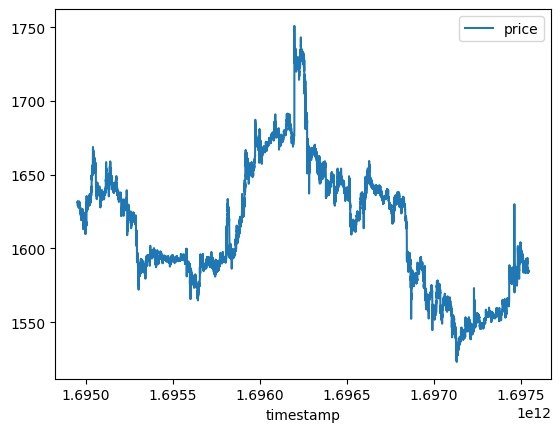

In [37]:
dfs['ETH'].plot()